----
# LDA classification using sklearn
With LDA for dimensionality reduction to 5 dimensions

----

In [31]:
%load_ext autoreload
%autoreload 2

from sklearn.metrics import confusion_matrix as skconfmatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Set correct working directory
if os.getcwd() != os.path.abspath("../Python"):
    os.chdir("../../Python")

# Import files from /Python directory
from confusion_matrix import confusion_matrix

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load training, validation and test data

In [32]:
# Use noisy data sets
noise = True

# Load data sets
trn_data = pd.read_csv(f"../TrainingData/neodata/zahra_all_{'no' if noise == False else ''}noise_1200.csv")
vld_data = pd.read_csv(f"../ValidationData/neodata/zahra_all_{'no' if noise == False else ''}noise_1200.csv")
tst_data = pd.read_csv(f"../TestData/neodata/zahra_all_{'no' if noise == False else ''}noise_100.csv")

# Separate into data and targets
y_trn = trn_data.pop('target')
X_trn = trn_data

y_vld = vld_data.pop('target')
X_vld = vld_data

y_tst = tst_data.pop('target')
X_tst = tst_data

targets = y_trn.unique().tolist()

----
# Fit LDA model to training data
First reduce all data sets to **5** dimensions using LDA and then fit a model to that data

----

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 5)

X_vld = lda.fit(X_trn,y_trn).transform(X_vld)
X_tst = lda.fit(X_trn,y_trn).transform(X_tst)
X_trn = lda.fit(X_trn,y_trn).transform(X_trn)

lda.fit(X_trn,y_trn)

LinearDiscriminantAnalysis(n_components=5)

----
## Classify training data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'LDA on training set : Accuracy 78.782%'}, xlabel='Predicted class', ylabel='True class'>)

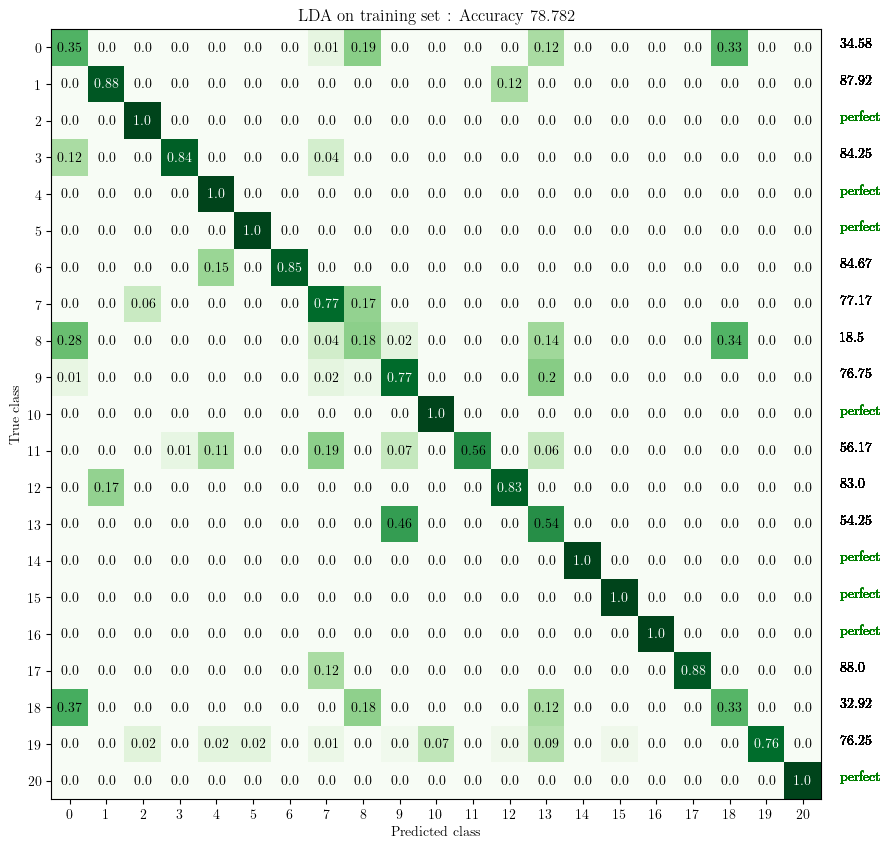

In [34]:
# Make predictions for the training set
y_hat_trn = lda.predict(X_trn)

#plot the confusion matrix
conf_matrix = skconfmatrix(y_trn,y_hat_trn)
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA on training set')

## Classify validation data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'LDA on validation set : Accuracy 78.734%'}, xlabel='Predicted class', ylabel='True class'>)

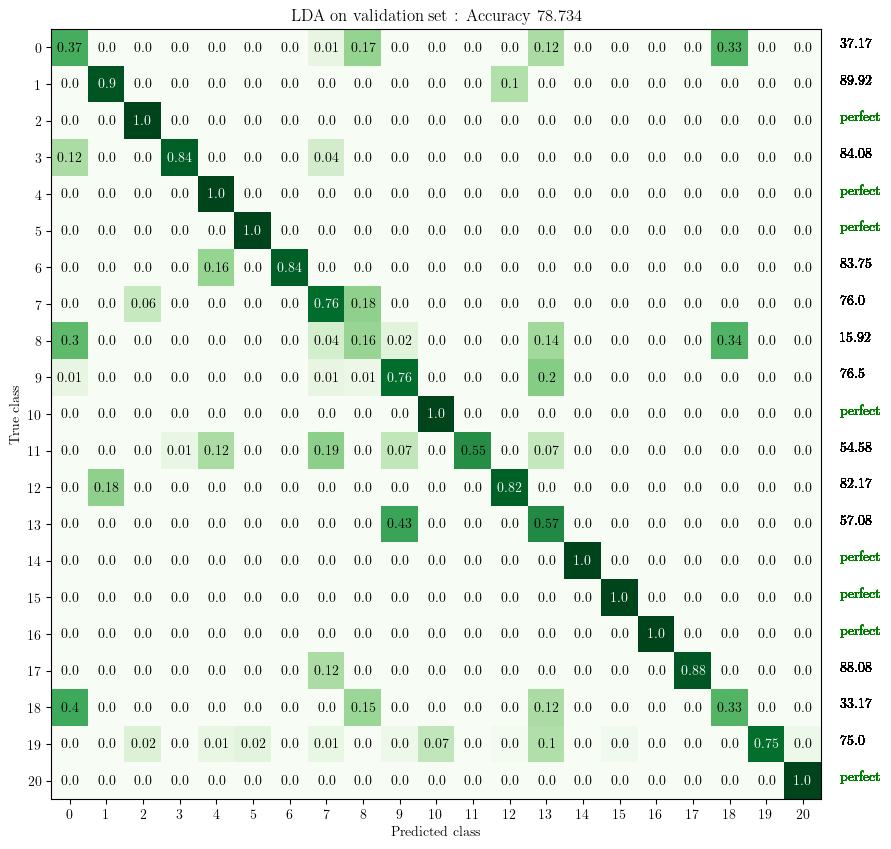

In [35]:
# Make predictions for the training set
y_hat_vld = lda.predict(X_vld)

#plot the confusion matrix
conf_matrix = skconfmatrix(y_vld,y_hat_vld)
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA on validation set')

## Classify test data

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'LDA on test set : Accuracy 71.429%'}, xlabel='Predicted class', ylabel='True class'>)

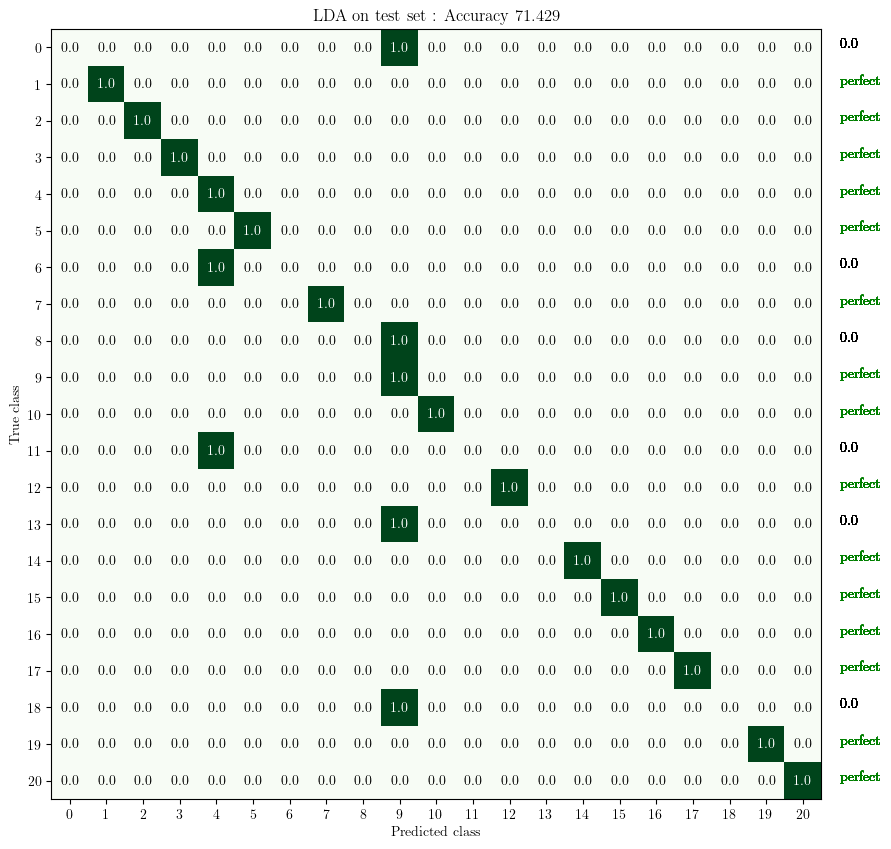

In [36]:
# Make predictions for the training set
y_hat_tst = lda.predict(X_tst)

#plot the confusion matrix
conf_matrix = skconfmatrix(y_tst,y_hat_tst)
confusion_matrix(conf_matrix, figsize = (10,10),title='LDA on test set')